# GROUP 16 - Assignment (Fundamentals of Machine Learning)

Team Members
- Arsha Jimmy (202281102)
- Lalith Balasubramanian (202254365)
- Prashant Ronsa (202251507)
- Reshma Sooraj (202268201)
- Sidharth Warrier Sasthangal (202288220)
- Vaisakh Constantine Francis (202252228)

# Kaggle Competition | CS986 Spotify Problem 2023 | Assignment

Music is an important part of human life because it serves as a tool for entertainment, relaxation, and communication. The introduction of digital music streaming platforms, particularly Spotify, has revolutionised the music industry in recent years, allowing music fans worldwide easy access to millions of songs.

<h4> Objective of the report is to focus of the below mentioed two points

1. Regression problem that aims to predict the popularity score of a song
2. Classification problem that aims to predict the top genre that a song belongs to

This Notebook will provide fundamental explanations of:

- Data Handling
- Machine learning Techniques such as: Linear Regression, PCA, Decision Tree, Random Forest, SVM, Naive Base
- Libraries used: NumPy, Pandas, SciKit-Learn, Matplotlib, OneHotEncoder, OrdinalEncoder, RobustScaler, StandardScaler, Metrics, Seaborn, Scipy, Sklearn.decomposition

<h3> First problem statement - "Regression Problem to predict the popularity score of a song"

Importing libraries required for the analysis & dataset csv file

To read the contents of the CS98XRegressionTrain.csv CSV file and create a DataFrame object named 'data' that contains the file's contents. The main goal in selecting song features was to consider all elements that comprise a song's personality and determine whether they have an impact on the target variable, which is popularity.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder,OrdinalEncoder,RobustScaler, StandardScaler
from sklearn import metrics
import seaborn as sns
from scipy import stats
from scipy.stats import norm, skew #for some statistics
from sklearn.decomposition import PCA
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv("CS98XRegressionTrain.csv")
data.shape

(453, 15)

- From this we can gather that the data contains 15 columns (features) & 453 rows (tuples)

<h4> Renaming 'popularity' column to 'pop'

In [3]:
data.rename({'pop': 'popularity'}, axis=1, inplace=True)

<h4> Checking if there are any duplicate & null values

In [4]:
data.duplicated().sum()
# data.isnull().sum()

0

- Column 'top genre' has different genre information all songs & since there are null values in column, we're going to fill missing values with the string "unassigned"

In [5]:
data['top genre'] = data['top genre'].fillna('unassigned')
# data.isnull.sum()

- This tells that we don't have any null values now

<h2> Exploratory Data Analysis

Before moving on to prediction, first we will try to gather some information from that available data with some exploratory data analysis

<h3> Checking the highest popularity score for the song

In [6]:
pop_data = data.sort_values('popularity', ascending=False)
# pop_data.head

<Figure size 432x432 with 0 Axes>

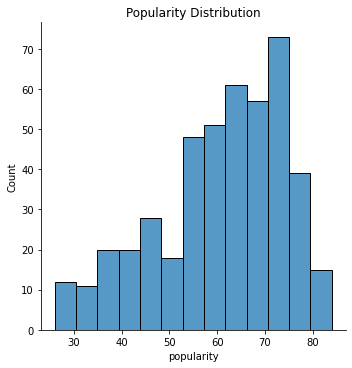

In [7]:
plt.figure(figsize=(6,6))
sns.displot(data['popularity'])
plt.title('Popularity Distribution')
plt.show()

- The above table provides information that the top popularity score for the songs in the dataset, with 'Bohemian Rhapsody - 2011 Mix' from the artist 'Queen' at a popularity score of 84, which is under the genre 'glam rock' originally released in the year 1975.
- Followed by the artists such as Coldplay, TOTO with popularity score of 83 & The Beatles with popularity score of 82
- Also, Queen has two songs with high popularity score of 84 & 82
- The lowest popularity score for any artist in the dataset is 26

<h3> In order to predict the popularity score of a song, we're going to check the correlation of popularity with other features of the dataset

Checking Correlation will help us identify if there are any features that are responsible for influencing the popularity score of a song in this dataset

Plotting a heatmap visualization of the correlation matrix for the DataFrame 'data'

<AxesSubplot:>

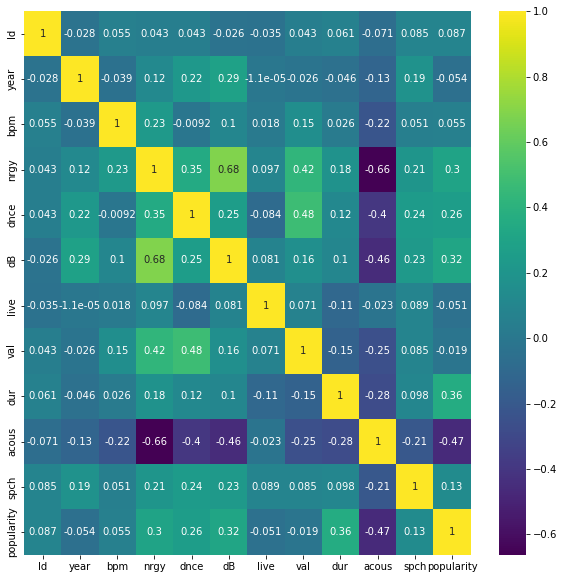

In [8]:
plt.figure(figsize=(10,10))
sns.heatmap(data.corr(),annot=True,cmap='viridis')

- The resulting visualisation depicts the correlations between all pairs of columns in the DataFrame, with brighter colours representing higher correlation values. Durability, dB, and nrgy were found to have a high correlation with target variable popularity.
- The above matrix implies that there's 'live', 'val' 'year', 'acous', 'spch' & 'bpm have negative to low corelation to popularity therefore they can be removed

<h2> Pre-processing and feature engineering

In [9]:
#data.info()

In [10]:
data.drop(['Id','title'],axis=1,inplace=True)

<h3> Splitting of the genre column into sub-genres is a useful technique in the analysis of the DataFrame
<h6> This allows us to analyze the data more effectively, build more accurate models, and make the data more consistent.

In [11]:
genre = (data["top genre"].str.strip()).str.lower()
gen = genre.str.split(" ",0)
new_genre = []
for i in gen:
    new_genre.append(i[-1])
new_genre=np.array(new_genre)
data['genre'] = new_genre.tolist()
data.drop(columns=['top genre'],axis=1,inplace=True)

- Grouping infrequent genres in a DataFrame's 'genre' column into a single category called 'others'. This is accomplished by identifying all genres that appear less than three times in the column and replacing them with 'others'. This method has the potential to simplify the analysis of a dataset that contains a large number of infrequent categories in a column.

In [12]:
v = data['genre'].value_counts()
data.loc[data['genre'].isin(v[v<3].index), 'genre'] = 'others'

<h2> Feature Engineering

To calculate the mean values of the "nrgy", "dnce", "dB", "acous", and "spch" columns for each artist in thedataset and create new features in the dataset that contain the mapped mean values for each artist. This technique can be useful for feature engineering in machine learning models that predict song popularity orother metrics based on artist characteristics.

<h3> Transforming 'artist' column on the basis of value counts of artists

In [13]:
count = data['artist'].value_counts()
data['value_count'] = data['artist'].apply(lambda x: count[x])
data['artist'] = data['value_count'].apply(lambda x: round(x/7,2))
data.drop(columns=['value_count'],axis=1,inplace=True)

Transformation of these features using log2 in order to make data linear and improve correlation

In [14]:
data['dur'] = np.log2(data['dur'])
data['nrgy'] = np.log2(data['nrgy'])
data['bpm'] = np.log2(data['bpm'])
# data.head

<h3> Using StandardScaler to perform feature scaling on the selected columns in the data dataframe

In [15]:
scl_attr = ['artist','year', 'bpm', 'nrgy', 'dnce', 'dB', 'live', 'val', 'dur',
       'acous', 'spch']
scaler = StandardScaler()
std_df = scaler.fit(data[scl_attr])
std_df_scaled = scaler.transform(data[scl_attr])
data[scl_attr] = pd.DataFrame(std_df_scaled)

<h2> Transformation

<h3> PCA (Principal Component Analysis)

The code performs PCA (Principal Component Analysis) on the selected features in the 'data' dataframe. Then_components parameter is set to 10, which means that the algorithm will reduce the dimensionality of the selected features to 10 principal components.


By reducing the dimensionality of a dataset, PCA can help to simplify the data and make it easier to analyze. It can also beused to visualize high-dimensional data in a lower-dimensional space, as well as to remove noise and redundant information from a dataset.

In [16]:
pca = PCA(n_components=5)
x_pca = pca.fit_transform(data[scl_attr])

In [17]:
x_data = data[[]]

In [18]:
data = pd.concat([data[['popularity','genre']].reset_index(drop=True), pd.DataFrame(x_pca)], axis='columns')
# data.head

<h2> Encoding

To perform one-hot encoding on the 'genre' column of DataFrame named 'data'
    

One-hot encoding is a process of converting categorical data into a binary representation that can be used for machine learning models

In [19]:
oh = OneHotEncoder(handle_unknown='ignore')
oh_genre = pd.DataFrame(oh.fit_transform(data[["genre"]]).toarray())
data = pd.concat([data.reset_index(drop=True), pd.DataFrame(oh_genre)], axis='columns')
data.drop(columns='genre',inplace=True)

<h2> Seperation of features and target variables

'x' contains all the input features for a machine learning model, while 'y' contains the corresponding target values that themodel will try to predict. This separation of features and target variables is a common approach in machine learning, and itallows us to train a model on a set of data and then use it to make predictions on new, unseen data.

In [20]:
x= data.loc[:, data.columns != 'popularity']
y = data[['popularity']]
# x.head

<h3> Linear Regression Model

To perform linear regression modeling using the scikit-learn library. The instance 'clf' will be used to train and make predictions using the linear regression model. Then the linear regression model is trained using the input features in 'x' and the target variable in 'y'.

In [21]:
from sklearn.linear_model import LinearRegression
clf = LinearRegression()
clf.fit(x,y)

LinearRegression()

In [22]:
print(clf.score(x,y))

0.43206351662283105


In [23]:
y_train_pred = clf.predict(x)
rmse = metrics.mean_squared_error(y, y_train_pred, squared=False)
print(rmse)

10.14005399814071


##### Mean absolute error 

In [52]:
from sklearn.metrics import mean_absolute_error

lin_mae = mean_absolute_error(y,y_train_pred)
lin_mae

3.0975298013245034

In [24]:
#clf.predict(x)

The calculated R-squared value measures how well the model fits the data, with a value of 1 indicating aperfect fit. Here the R-squared value so obtained is 0.4382

The mean_squared_error() function from the sklearn.metrics module is used to calculate the mean squarederror, and the squared parameter is set to False to return the RMSE instead of the squared error. The soobtained RMSE is 10.0845

Then the trained model is used to make predictions on the input features in 'x'. The predict() method of theLinearRegression class is used to make the predictions, and the resulting predictions are returned.

<h2> Decision Tree Regression

This is done to create a Decision Tree Regressor model and fits it on input and output data, prints the R-squared value to evaluate the goodness of fit, makes predictions using the fitted model, calculates theRMSE to evaluate the prediction accuracy, and prints the RMSE value.
    
The Decision Tree Regressor model object is created with a random state of 0. The random state is used tomake the results reproducible.

Then the Decision Tree Regressor model is made to fit on the input data x and output/target data y.

In [25]:
from sklearn.tree import DecisionTreeRegressor 
# create a regressor object
dtr = DecisionTreeRegressor(random_state = 0)
# fit the regressor with X and Y data
dtr.fit(x,y)

DecisionTreeRegressor(random_state=0)

In [26]:
print(dtr.score(x,y))

1.0


The R-squared value of the Decision Tree Regressor model is generated. The R-squared value is a statisticalmeasure that represents the proportion of the variance in the dependent variable that is explained by theindependent variables in the model. A higher R-squared value indicates a better fit of the model. The Rsquared value obtained for the model is 1

In [27]:
y_train_pred = dtr.predict(x)
rmse = metrics.mean_squared_error(y, y_train_pred, squared=False)
print(rmse)

0.0


The root mean squared error (RMSE) between predicted and actual output values (y train pred) is calculated. The root mean square error (RMSE) is a popular metric for assessing the performance of regression models. It computes the average difference between predicted and observed values in the same units as the target variable.. Here the RMSE value obtained is 0.

<h2> Random Forest Regression

In [28]:
from sklearn.ensemble import RandomForestRegressor
# Instantiate model with 1000 decision trees
rf = RandomForestRegressor(n_estimators = 1000, random_state = 42)
# Train the model on training data
rf.fit(x,y);

Here a Random Forest Regressor model is created, fits it on input and output data, prints the R-squaredvalue to evaluate the goodness of fit, makes predictions using the fitted model, calculates the RMSE toevaluate the prediction accuracy, and prints the RMSE value. We tried to create a Random Forest Regressormodel object with 1000 trees and a random state of 42 and to fit the Random Forest Regressor model on the input data x and output data y.

In [29]:
print(rf.score(x,y))

0.9155704620755731


R-squared value of the Random Forest Regressor model is calculated. The R-squared value is a statisticalmeasure that represents the proportion of the variance in the dependent variable that is explained by theindependent variables in the model. A higher R-squared value indicates a better fit of the model.The Rsquared value of the obtained model is 0.91551

In [30]:
y_train_pred = rf.predict(x)
rmse = metrics.mean_squared_error(y, y_train_pred, squared=False)
print(rmse)

3.9096473870349517


The root mean squared error (RMSE) between the predicted output values (y_train_pred) and the actual output values (y) is calculated.
    
RMSE is a commonly used metric to evaluate the performance of regression models. It measures the average difference between the predicted and actual values in the same units as the target variable.
    
The RMSE value obtained for the predictions is 3.9108

In [31]:
#rf.predict(x)

<h2> Preparation of Test Data

It is important to ensure that the test data is representative of the real-world data that the model will encounter and to preprocess the data in the same way as the training data to ensure that the evaluation metrics accurately reflect the performance of the model.

Pre-processing of the test data in the same way as the training data is done. This includes removal of nullvalues and replacing the same by string 'unassigned'.
Splitting of the genre column into sub-genres is auseful technique in the analysis of the DataFrame.
Grouping of infrequent genres in the 'genre' column of aDataFrame into a single category called 'others'

In [32]:
data_test = pd.read_csv("CS98XRegressionTest.csv")
# data_test.isna().sum()

In [33]:
data_test['top genre'] = data_test['top genre'].fillna('unassigned')
data_test.rename({'pop': 'popularity'}, axis=1, inplace=True)
# data_test.drop(columns=['bpm','live','val','spch'],axis=1,inplace=True)
data_test.drop(['Id','title'],axis=1,inplace=True)

In [34]:
data_test['dur'] = np.log2(data_test['dur'])
data_test['nrgy'] = np.log2(data_test['nrgy'])
data_test['bpm'] = np.log2(data_test['bpm'])

In [35]:
genre = (data_test["top genre"].str.strip()).str.lower()
gen = genre.str.split(" ",0)
new_genre = []
for i in gen:
    new_genre.append(i[-1])
new_genre=np.array(new_genre)
data_test['genre'] = new_genre.tolist()
data_test.drop(columns=['top genre'],axis=1,inplace=True)

In [36]:
v = data_test['genre'].value_counts()
data_test.loc[data_test['genre'].isin(v[v<3].index), 'genre'] = 'others'

In [37]:
count = data_test['artist'].value_counts()
data_test['value_count'] = data_test['artist'].apply(lambda x: count[x])
data_test['artist'] = data_test['value_count'].apply(lambda x: round(x/7,2))
data_test.drop(columns=['value_count'],axis=1,inplace=True)

<h3> Performing feature scaling on the selected columns in the test data dataframe

In [38]:
std_df_scaled_t = scaler.transform(data_test[scl_attr])
data_test[scl_attr] = pd.DataFrame(std_df_scaled_t)
# data_test.head

In [39]:
xtest_pca = pca.transform(data_test[scl_attr])

In [40]:
data_test = pd.concat([data_test[['genre']].reset_index(drop=True), pd.DataFrame(xtest_pca)], axis='columns')
# data_test.head

<h3> Perform feature transformation on the selected columns in the test data dataframe

In [41]:
oh_genre_t = pd.DataFrame(oh.transform(data_test[["genre"]]).toarray())
data_test = pd.concat([data_test.reset_index(drop=True), pd.DataFrame(oh_genre_t)], axis='columns')
data_test.drop(columns='genre',inplace=True)
# data_test.head(2)

In [42]:
type(data_test)

pandas.core.frame.DataFrame

In [43]:
spotify_pred = clf.predict(data_test)
#spotify_pred

<h3> Tested the Linear Regression Model(clf) and Random Forest regression model(rf) on the test data and made predictions

In [44]:
spotify_pred = rf.predict(data_test)
# spotify_pred

In [45]:
data_sub = pd.read_csv("CS98XRegressionTest.csv")
spotify_submit = pd.DataFrame([data_sub.loc[:,"Id"]]).T
# spotify_submit.size

In [46]:
spotify_submit['pop'] = pd.DataFrame(spotify_pred.round().astype(int))
spotify_submit.to_csv('spotify_submit_preds_rf.csv',index=False)
# spotify_submit.head

In [47]:
# bar plot for test data columns

# feat_importances = pd.Series(rf.feature_importances_, index=data_test.columns)
# feat_importances.nlargest(12).plot(kind='barh')

<h2> Conclusion

- Based on the matrix the best trained model that performed well is Random Forest, while testing it on the "test" data and cross-referrencing with the Kaggle Competition score (i.e., 6.84028) which we believe it is a good score

<h2> Second problem statement - "Classification problem to predict the top genre that a song belongs to"

The aim of this project is to build a model that predicts the top genre a song belongs to.

<h3> Importing additional libraries & train dataset csv file to performing a classification analysis

In [48]:
from sklearn.ensemble import RandomForestClassifier  
from sklearn.tree import DecisionTreeClassifier 
from sklearn.inspection import permutation_importance
from scipy.stats.mstats import winsorize
from sklearn.naive_bayes import GaussianNB

In [49]:
data_train = pd.read_csv("CS98XClassificationTrain.csv")
# data_train.head

FileNotFoundError: [Errno 2] No such file or directory: 'CS98XClassificationTrain.csv'

In [ ]:
df = data_train.groupby(['artist', 'top genre'])

In [ ]:
data_train.rename({'pop': 'popularity'}, axis=1, inplace=True)
# data_train.isna().sum()

Here we grouped the data by artist and top genre, this helps in analyzing whether certain musical genres tend to be associated with certain musical characteristics, or to compare the popularity of different artists within the same genre. By grouping the data in this way, we can more easily analyze and compare the musical characteristics of each artist within each genre.

<h3> Removing Null values from the data

In [ ]:
data_train.dropna(inplace=True)

In [ ]:
data_train['dur'] = data_train[['dur']]/60
# data_train.head

Changing the dataset's duration column from seconds to minutes. This is due to the fact that the original duration values are in seconds, which can be a very large number for some songs, and converting it to minutes can make it easier to work with and interpret.

In [ ]:
# plt.figure(figsize=(10,8))
# sns.heatmap(data_train.corr(),annot=True,cmap='viridis')

Looking at the heatmap, we can see that some features are strongly positively correlated with each other, such as 'dnce' and 'val' (0.47), 'nrgy' and 'dB' (0.69), 'dB' and 'popularity' (0.31), and 'dur' and 'popularity' (0.32). On the other hand, some features are strongly negatively correlated, such as 'acous' and 'nrgy' (-0.66) and 'acous' and 'popularity' (-0.44).

Some features have weak or no correlation with other features, such as 'year' with most of the other features, and 'spch' with most of the other features. This indicates that these features may not be as important in predicting the target variable, and may be dropped in a feature selection process.

In [ ]:
data_train['aud_mean']  = data_train[['bpm', 'dnce','dB','val','acous']].mean(axis=1)

The 'aud_mean' column is calculated by taking the mean of the values in five existing columns in the same row: bpm, dnce, dB, val, and acous.

In [ ]:
%matplotlib inline
data_train.hist(bins=20, figsize=(8,8))
plt.show()

With the help of the histogram of the numerical features that 'live' , 'speech' , 'acous' are skewed

In [ ]:
# ot_columns = ['bpm','dnce','dB','live','val','dur','acous','spch','popularity']
# data_train.boxplot(ot_columns)

We have plotted boxplots for several features (bpm, dnce, dB, live, val, dur, acous, spch, and popularity) in the dataset data_train. This can help to identify any potential outliers in these features and provide a visual representation of the distribution of the data in each feature.

dev = data_train['bpm'].quantile(0.50) ma = data_train['bpm'].quantile(0.90) print(dev,ma) data_train['bpm'] = np.where(data_train['bpm'] > ma, dev, data_train['bpm'])

In [ ]:
# dev = data_train['bpm'].quantile(0.50)
# ma = data_train['bpm'].quantile(0.90)
# print(dev,ma)
# data_train['bpm'] = np.where(data_train['bpm'] > ma, dev, data_train['bpm'])

# Q1 = data_train['live'].quantile(0.25)
# Q3 = data_train['live'].quantile(0.75)
# IQR = Q3 - Q1

# # Find the outlier rows
# outliers = data_train[(data_train['live'] < Q1 - 1.5*IQR) | (data_train['live'] > Q3 + 1.5*IQR)]

# # Print the outlier rows
# print(outliers)

# data_train['live'] = winsorize(data_train['live'], limits=[0.05, 0.05])
# data_train['spch'] = winsorize(data_train['spch'], limits=[0.05, 0.05])

Inorder to treat outliers in the dataset for the features 'bpm', 'live', and 'spch', the median value (50th percentile) of the 'bpm' feature and the first quartile (25th percentile), third quartile (75th percentile), and interquartile range (IQR) for the 'live' feature is calculated. Then, we identified rows where the 'live' feature is more than 1.5 times the IQR below the first quartile or above the third quartile. These rows are considered outliers.The outliers in the 'live' and 'spch' features are replaced with values that are within a certain percentile range. The limits parameter is set to [0.05, 0.05], which means that the lowest 5% of the values and the highest 5% of the values will be replaced with the closest non-outlier values.

But we found that the handling of outliers didnot improve the model , this was opted out

In [ ]:
# data_train.boxplot(ot_columns)

In [ ]:
data_train.drop(columns=['live'],axis=1,inplace=True)

<h3> The features 'live, 'acous' are skewed

In [ ]:
artist_stats = data_train.groupby("artist").agg({"bpm": "mean", "dnce": "mean","dB": "mean","val": "mean"
                                                   ,"acous": "mean"}).to_dict()
data_train["artist_bpm_mean"] = data_train["artist"].map(artist_stats["bpm"])
data_train["artist_dnce_mean"] = data_train["artist"].map(artist_stats["dnce"])
data_train["artist_dB_mean"] = data_train["artist"].map(artist_stats["dB"])
data_train["artist_val_mean"] = data_train["artist"].map(artist_stats["val"])
data_train["artist_acous_mean"] = data_train["artist"].map(artist_stats["acous"])
# data_train.drop(columns=['artist'],axis=1,inplace=True)

In [ ]:
# data_train.columns

In [ ]:
# data_train.head

LabelEncoder is a utility class in scikit-learn that helps to encode categorical data into numerical data.

It works by giving each category in a categorical feature a unique numerical value. Label encoding gives each category in the column a unique numerical value, with the first category getting a value of 0, the second getting a value of 1, and so on. It is used to encode the categorical variable "genre" into numerical values in this case. However, because we discovered that a one-hot encoder provides better performance, it was used.

In [ ]:
# #Label encode genre
# #Lable encode genre
# from sklearn.preprocessing import LabelEncoder

# #create instance of label encoder
# lab = LabelEncoder()
# data_train['genre'] = lab.fit_transform(data_train['genre'])
# # data.drop(columns=['top genre'],axis=1,inplace=True)

In [ ]:
# #Label encode artist
# from sklearn.preprocessing import LabelEncoder

# #create instance of label encoder
# lab = LabelEncoder()
# data_train['artist'] = lab.fit_transform(data_train['artist'])
# # data.drop(columns=['top genre'],axis=1,inplace=True)

In [ ]:
# oh = OneHotEncoder(handle_unknown='ignore')
# oh_artist = pd.DataFrame(oh.fit_transform(data_train[["artist"]]).toarray())

<h2> Scaling the features using StandardScaler

In [ ]:
# # Scale the features
from sklearn import preprocessing
scaler = preprocessing.StandardScaler()

scl_attr = ['bpm','dnce','dB','val','dur','acous','aud_mean','spch','popularity','artist_bpm_mean', 'artist_dnce_mean', 'artist_dB_mean',
       'artist_val_mean', 'artist_acous_mean']
ot_columns = ['Id','title','artist','year', 'top genre','nrgy']
# data_train[scl_attr] = std_scaler.fit_transform(data_train[scl_attr])

# scaler = preprocessing.RobustScaler()
# robust_df = scaler.fit(data_train[scl_attr])
# robust_df_scaled = scaler.transform(data_train[scl_attr])
# data_train[scl_attr] = pd.DataFrame(robust_df_scaled)

# scaler = preprocessing.RobustScaler()
robust_df = scaler.fit(data_train[scl_attr])
robust_df_scaled = scaler.transform(data_train[scl_attr])

data_train = pd.concat([data_train[ot_columns].reset_index(drop=True), pd.DataFrame(robust_df_scaled,columns=scl_attr)], axis='columns')

The Standard Scaler scales the data based on mean and standard deviation. It assumes that the data follows a normal distribution and scales the data so that it has a mean of 0 and a standard deviation of 1. However, the standard scaler is sensitive to outliers in the data. If there are outliers in the data, the mean and standard deviation are affected, and the scaled values may not be representative of the true distribution of the data.

On the other hand, Robust Scaler is a technique that scales the data based on percentiles. It is more robust to outliers as it scales the data using the interquartile range (IQR) and the median. This makes it more useful when dealing with data that has a lot of outliers, as it is less affected by them.

Here standard scaler is used to encode 'artist' into numerical values since the variables with outliers were handled and gave better performance than robust scaler

<h2> Principal Component Analysis (PCA) 

In [ ]:
pca = PCA(n_components=7)
x_pca = pca.fit_transform(data_train[scl_attr])
data_train = pd.concat([data_train[ot_columns].reset_index(drop=True), pd.DataFrame(x_pca)], axis='columns')

Here Principal Component Analysis (PCA) is used to identify and remove correlated features in the dataset. Correlated features can introduce multicollinearity, which can affect the stability and interpretability of a machine learning model. PCA helps to transform the original features into a new set of uncorrelated features, known as principal components, that explain the maximum variance in the data. By retaining only the top principal components, we can reduce the dimensionality of the data and remove the correlation between features. This can help to reduce overfitting and improve the generalization performance of the machine learning model.

In [ ]:
oh = OneHotEncoder(handle_unknown='ignore')
oh_artist = oh.fit_transform(data_train[["artist"]]).toarray()
# oh_artist.shape

In [ ]:
data_train = pd.concat([data_train.reset_index(drop=True), pd.DataFrame(oh_artist)], axis='columns')
data_train.drop(columns='artist',inplace=True)

In [ ]:
#drop unnecessary columns
data_train.drop(columns=['Id','title','nrgy'],axis=1,inplace=True)
# data_train.head

In [ ]:
# oh_artist

OneHot encoding is a process that converts categorical data into numerical data by creating binary columns for each category of a categorical feature. Each binary column represents one category, and the value of the column is either 0 or 1, depending on whether the corresponding data point belongs to that category or not. One hot encoding helps to prevent the machine learning algorithm from assigning incorrect or inappropriate numerical values to the categories, which can lead to inaccurate predictions or results. Here the one-hot encoder transforms these artist names into a set of binary features, where each feature corresponds to one artist name.

In [ ]:
# lab.classes_

In [ ]:
# integer_mapping = {l: i for i, l in enumerate(lab.classes_)}
# integer_mapping

Unnecessary features like 'Id', 'title' , 'nrgy' were dropped

In [ ]:
x= data_train.loc[:, data_train.columns != 'top genre']
y = data_train[['top genre']]
y.shape

In [ ]:
x.shape

<h2> KNN CLassifier

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

knn = KNeighborsClassifier(n_neighbors=61)
#cross_validate
cv_scores = cross_val_score(knn, x, y, cv=10)
knn.fit(x, y)

In [ ]:
accuracy_score = knn.score(x, y)
print("Accuracy score = ""{:.2f}".format(accuracy_score))

In this case, the accuracy score is 0.32, which means that the model is correct in predicting the genre of a song approximately 32% of the time.

In [ ]:
cv_scores_mean = np.mean(cv_scores)
print(cv_scores , "\n\n""mean =" ,"{:.2f}".format(cv_scores_mean))

In this case, the cv_scores_mean is 0.29, which means that the KNN classifier is expected to predict the genre of a song correctly 29% of the time on unseen data.

Logistic regression is a machine learning algorithm used for binary classification problems, where the goal is to predict whether an instance belongs to one class or the other. It is a type of supervised learning algorithm, meaning it requires labeled data to train a model.

In logistic regression, the algorithm models the probability of an instance belonging to a particular class using a logistic function. The logistic function maps any input value to a value between 0 and 1, so the output can be interpreted as the probability of an instance belonging to one class. The algorithm estimates the parameters of the logistic function using the labeled data to create a model.

<h2> Logistics Regression

In the context of the Spotify dataset, logistic regression could be used to predict whether a song is popular or not based on its audio features. This is a binary classification task, where the target variable is a binary indicator (1 for popular songs, 0 for non-popular songs). Logistic regression works by estimating the probability of a binary outcome given the values of the input features. It then applies a threshold (usually 0.5) to this probability to make a binary prediction.

In [ ]:
from sklearn.linear_model import LogisticRegression
log = LogisticRegression(multi_class = 'ovr')

In [ ]:
log.fit(x, y)

In [ ]:
accuracy_score = log.score(x, y)
print("Accuracy score = ""{:.2f}".format(accuracy_score))

In this case, the accuracy score is 0.55, predicting the genre of a song approximately 55% of the time., which is an improvement from K-means model

<h2> Random Forest

Random Forest is a machine learning algorithm used for classification and regression problems. It is an ensemble method, which means it combines multiple decision trees to make a more accurate and stable prediction.

In [ ]:
rf=RandomForestClassifier(n_estimators=50)       
rf.fit(x,y)      

In [ ]:
accuracy_score = rf.score(x, y)
print("Accuracy score = ""{:.2f}".format(accuracy_score))

In this case, the accuracy score is 1.00, which means that the model is accurately predicting the genre of a song  most of the time.

In [ ]:
# data_train.columns

In [ ]:
# columns_imp = 
# feat_importances = pd.Series(rf.feature_importances_, index=data_train.columns)
# feat_importances.nlargest(11).plot(kind='barh')

<h2> Naive Base

In [ ]:
nbc = GaussianNB()
nbc.fit(x,y)

In [ ]:
accuracy_score = nbc.score(x, y)
print("Accuracy score = ""{:.2f}".format(accuracy_score))

In this case, the accuracy score is 1.00, which means that this model is also predicting the genre of a song accurately most of the time.

<h2> Importing Test Data

In [ ]:
data_test = pd.read_csv("CS98XClassificationTest.csv")

In [ ]:
data_test.rename({'pop': 'popularity'}, axis=1, inplace=True)

In [ ]:
data_test['aud_mean']  = data_test[['bpm', 'dnce','dB','val','acous']].mean(axis=1)

In [ ]:
ot_columns = ['bpm','dnce','dB','live','val','dur','acous','spch','popularity']
# data_test.boxplot(ot_columns)

In [ ]:
dev = data_test['bpm'].quantile(0.50)
ma = data_test['bpm'].quantile(0.90)
print(dev,ma)
data_test['bpm'] = np.where(data_test['bpm'] > ma, dev, data_test['bpm'])

In [ ]:
# data_test.boxplot(ot_columns)

In [ ]:
# data_test.head

In [ ]:
artist_stats = data_test.groupby("artist").agg({"bpm": "mean", "dnce": "mean","dB": "mean","val": "mean"
                                                   ,"acous": "mean"}).to_dict()
data_test["artist_bpm_mean"] = data_test["artist"].map(artist_stats["bpm"])
data_test["artist_dnce_mean"] = data_test["artist"].map(artist_stats["dnce"])
data_test["artist_dB_mean"] = data_test["artist"].map(artist_stats["dB"])
data_test["artist_val_mean"] = data_test["artist"].map(artist_stats["val"])
data_test["artist_acous_mean"] = data_test["artist"].map(artist_stats["acous"])

In [ ]:
data_test[scl_attr] = scaler.transform(data_test[scl_attr])

In [ ]:
# data_test.head

# PCA on test data

In [ ]:
ot_columns = ['Id','title','artist','year', 'nrgy']
x_pca = pca.transform(data_test[scl_attr])
data_test = pd.concat([data_test[ot_columns].reset_index(drop=True), pd.DataFrame(x_pca)], axis='columns')
# data_test.head

In [ ]:
data_test.drop(columns=['Id','title','nrgy'],axis=1,inplace=True)

In [ ]:
oh_artist_t = oh.transform(data_test[["artist"]]).toarray()
data_test = pd.concat([data_test.reset_index(drop=True), pd.DataFrame(oh_artist_t)], axis='columns')
data_test.drop(columns='artist',inplace=True)
# data_test.head

In [ ]:
genre_preds = knn.predict(data_test)
# genre_preds

In [ ]:
# data_test.head

In [ ]:
data_sub = pd.read_csv("CS98XClassificationTest.csv")
spotify_submit = pd.DataFrame([data_sub.loc[:,"Id"]]).T

In [ ]:
spotify_submit['top genre'] = pd.DataFrame(genre_preds)
# spotify_submit

In [ ]:
spotify_submit.to_csv('spotify_submit_preds_cl_knn.csv',index=False)

# Logistic Regression

In [ ]:
genre_preds_log = log.predict(data_test)

In [ ]:
data_sub_log = pd.read_csv("CS98XClassificationTest.csv")
spotify_submit_log = pd.DataFrame([data_sub.loc[:,"Id"]]).T
# spotify_submit_log['title'] = pd.DataFrame([data_sub_log.loc[:,"title"]]).T
spotify_submit_log['top genre'] = pd.DataFrame(genre_preds_log)
spotify_submit.to_csv('spotify_submit_preds_cl_log.csv',index=False)

# Random Forest

In [ ]:
genre_preds_rf = rf.predict(data_test)
# genre_preds_rf

In [ ]:
data_sub_rf = pd.read_csv("CS98XClassificationTest.csv")
spotify_submit_rf = pd.DataFrame([data_sub.loc[:,"Id"]]).T
# spotify_submit_rf['title'] = pd.DataFrame([data_sub_rf.loc[:,"title"]]).T
spotify_submit_rf['top genre'] = pd.DataFrame(genre_preds_rf)
spotify_submit_rf.to_csv('spotify_submit_preds_cl_rf.csv',index=False)

# Naive Base

In [ ]:
genre_preds_nbc = nbc.predict(data_test)
# genre_preds_nbc

In [ ]:
data_sub_nbc = pd.read_csv("CS98XClassificationTest.csv")
spotify_submit_nbc = pd.DataFrame([data_sub_nbc.loc[:,"Id"]]).T
spotify_submit_nbc['top genre'] = pd.DataFrame(genre_preds_nbc)
spotify_submit_nbc.to_csv('spotify_submit_preds_cl_nbc.csv',index=False)

# Conclusion

- We implemented the same models for the test data as well and while comparing and contrasting the accuracy result from the Kaggle Classifier Competition (i.e., 0.51785) which we believe it is a good score as per our conclusion